In [35]:
#!pip install seaborn
#!pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.0/9.3 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.0/9.3 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.1/9.3 MB 328.2 kB/s eta 0:00:29
   ---------------------------------------- 0.1/9.3 MB 374.1 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.3 MB 374.1 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.3 MB 364.4 kB/s eta 0:00:26
    --------------------------------------- 0.1/9.3 MB 343.4 kB/s eta 0:00:27
    --------------------------------------- 0.2/9.3 MB 378.3 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.3 MB 378.3 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.3 MB 327.7 kB/s eta 0:00:28
    --------------------------------------- 0.2/9.3 MB 327.7 kB/s eta 0:00:28
 

In [102]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
data = pd.read_csv("Titanic-Dataset.csv")

In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop the 'Name' column from the DataFrame
data.drop('Name', axis=1, inplace=True)

In [11]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [6]:
data = pd.read_csv("SVMtrain.csv")

In [7]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [104]:
# Data preprocessing
data.dropna(inplace=True)  # Dropping rows with missing values
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)  # Convert categorical variables to dummy/indicator variables

In [105]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_female   889 non-null    bool   
 8   Embarked_2   889 non-null    bool   
 9   Embarked_3   889 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.3 KB


In [106]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Embarked_2     0
Embarked_3     0
dtype: int64

In [109]:
data.shape

(889, 10)

In [110]:
data["Survived"].unique()

array([0, 1], dtype=int64)

In [111]:
print(data.corr()["Survived"].abs().sort_values(ascending=False))

Survived       1.000000
Sex_female     0.541585
Pclass         0.335549
Fare           0.255290
Embarked_3     0.151777
Age            0.116558
Parch          0.083151
SibSp          0.034040
PassengerId    0.005028
Embarked_2     0.004536
Name: Survived, dtype: float64


In [112]:
average_age = data['Age'].mean()
print("Average age:", average_age)

Average age: 35.686355455568055


In [114]:
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)


Survival Rate by Passenger Class:
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [116]:
# Survival rate by age group
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(survival_by_age_group)


Survival Rate by Age Group:
AgeGroup
0-18     0.503597
19-30    0.355556
31-50    0.420833
51+      0.304167
Name: Survived, dtype: float64


In [117]:
# Survival rate by presence of family
data['Family'] = data['SibSp'] + data['Parch']
survival_by_family = data.groupby('Family')['Survived'].mean()
print("\nSurvival Rate by Presence of Family:")
print(survival_by_family)


Survival Rate by Presence of Family:
Family
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [118]:
# Survival rate by fare class
survival_by_fare = data.groupby(pd.qcut(data['Fare'], 5))['Survived'].mean()
print("\nSurvival Rate by Fare Class:")
print(survival_by_fare)


Survival Rate by Fare Class:
Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.075]       0.426901
(21.075, 39.688]     0.441989
(39.688, 512.329]    0.637931
Name: Survived, dtype: float64


In [119]:
# Load the Titanic dataset
data = pd.read_csv("SVMtrain.csv")

In [120]:
# Select numeric columns for standardization or normalization
numeric_columns = ['Age', 'Fare']

In [121]:
# Standardization
scaler_standard = StandardScaler()
data_standardized = data.copy()
data_standardized[numeric_columns] = scaler_standard.fit_transform(data_standardized[numeric_columns])

In [122]:
# Normalization
scaler_minmax = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numeric_columns] = scaler_minmax.fit_transform(data_normalized[numeric_columns])

In [123]:
print("Standardized Data:")
print(data_standardized.head())

Standardized Data:
   PassengerId  Survived  Pclass     Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    Male -0.771204      1      0 -0.500240   
1            2         1       1  female  0.130370      1      0  0.788947   
2            3         1       3  female -0.545810      0      0 -0.486650   
3            4         1       1  female -0.038675      1      0  0.422861   
4            5         0       3    Male -0.038675      0      0 -0.484133   

   Embarked  
0         3  
1         1  
2         3  
3         3  
4         3  


In [124]:
print("Standardized Data:")
print(data_standardized.head())

Standardized Data:
   PassengerId  Survived  Pclass     Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    Male -0.771204      1      0 -0.500240   
1            2         1       1  female  0.130370      1      0  0.788947   
2            3         1       3  female -0.545810      0      0 -0.486650   
3            4         1       1  female -0.038675      1      0  0.422861   
4            5         0       3    Male -0.038675      0      0 -0.484133   

   Embarked  
0         3  
1         1  
2         3  
3         3  
4         3  


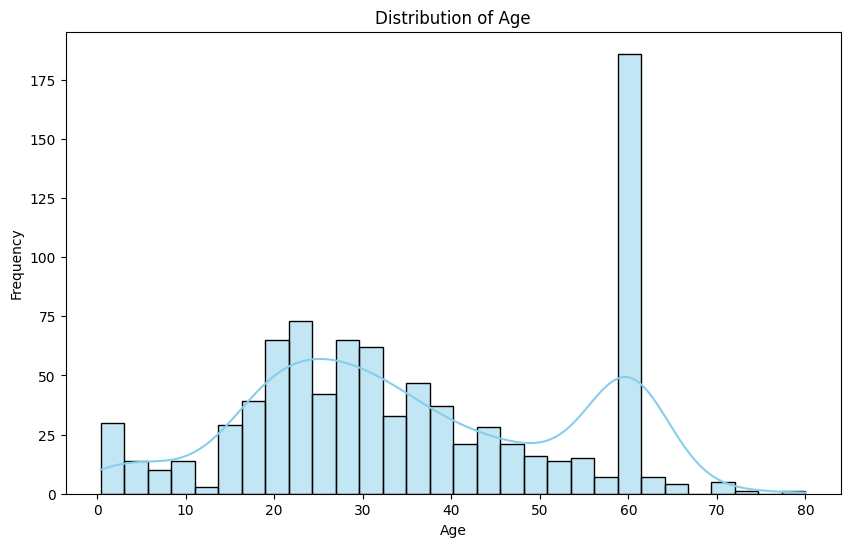

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

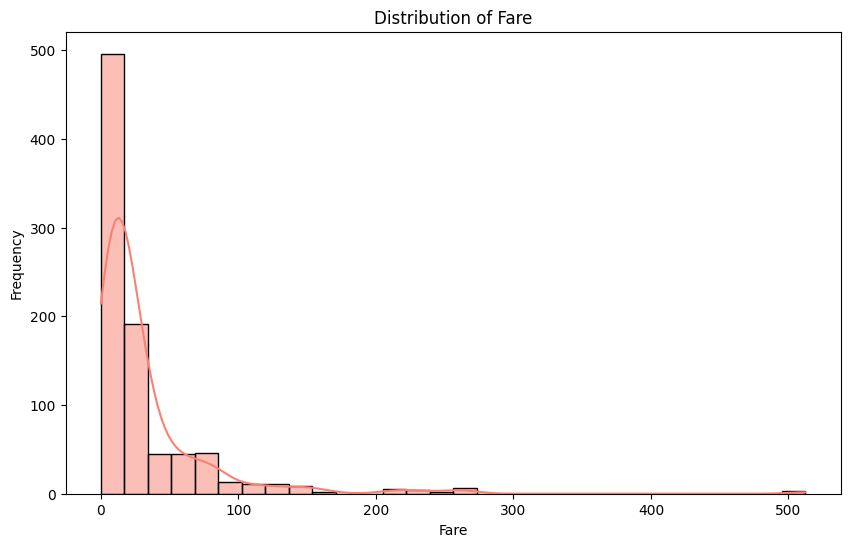

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', kde=True, bins=30, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

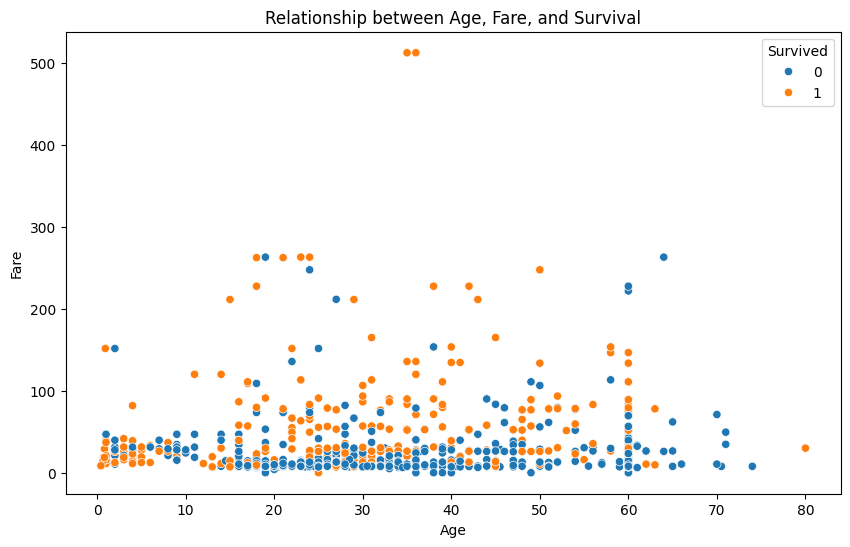

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.title('Relationship between Age, Fare, and Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

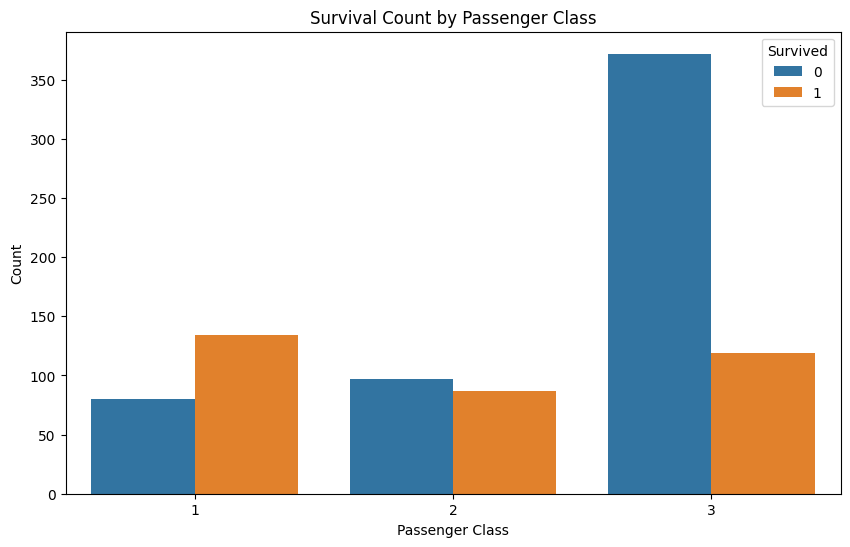

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

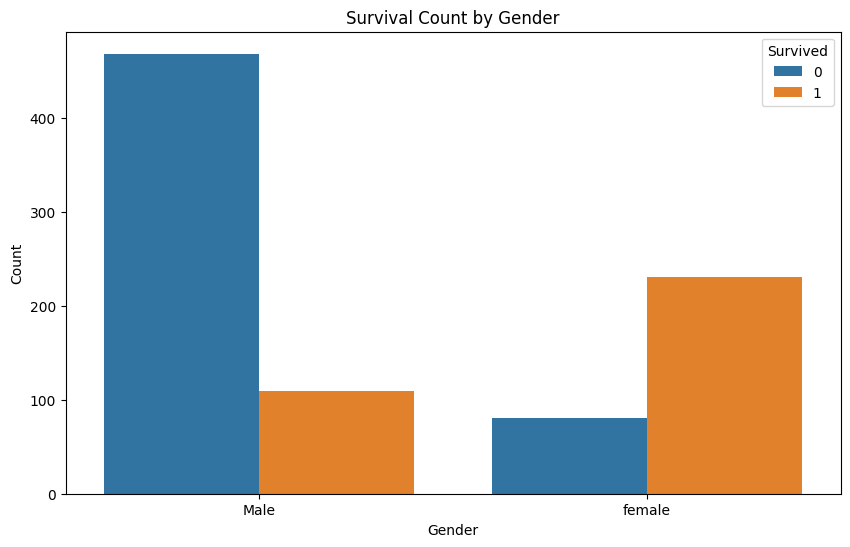

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [135]:
data.dropna(inplace=True)

In [136]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [137]:
# Selecting features and target variable
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [138]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Training and evaluation
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {clf_name}: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training Logistic Regression...
Accuracy of Logistic Regression: 0.79
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Training Decision Tree...
Accuracy of Decision Tree: 0.71
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       109
           1       0.61      0.68      0.64        69

    accuracy                           0.71       178
   macro avg       0.70      0.70      0.70       178
weighted avg       0.72      0.71      0.71       178

Training Random Forest...
Accuracy of Random Forest: 0.79
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.72      0.72      0.72        